In [ ]:
'''
US gasoline and diesel retail prices prediction
'''

In [ ]:
'''
Источник: Набор данных Управления энергетической информации США (январь 2021 г.).

Используем линейную регрессию, чтобы спрогнозировать цену на дизельное топливо в 2022 году.

Чем обычный бензин отличается от среднего или премиум-класса?

A1 = Еженедельные розничные цены на бензин всех марок и всех составов в США (долларов за галлон)
A2 = Еженедельные розничные цены на обычный бензин всех марок в США (долларов за галлон)
A3 = Еженедельные розничные цены на бензин всех марок в США (долларов за галлон)
R1 = еженедельные розничные цены на бензин для всех видов бензина в США (долларов за галлон)
R2 = еженедельные обычные розничные цены на бензин в США (долларов за галлон)
R3 = еженедельные розничные цены на бензин стандартного реформулированного бензина в США (долларов за галлон)
M1 = еженедельные розничные цены на бензин среднего класса для всех составов в США (долларов за галлон)
M2 = еженедельные розничные цены на обычный бензин средней категории в США (долларов за галлон)
M3 = еженедельные розничные цены на реформулированный бензин среднего класса в США (долларов за галлон)
P1 = еженедельные розничные цены на бензин премиум-класса для всех составов в США (долларов за галлон)
P2 = Еженедельные розничные цены на обычный бензин премиум-класса в США (долларов за галлон)
P3 = еженедельные розничные цены на реформулированный бензин премиум-класса в США (долларов за галлон)
D1 = еженедельные розничные цены на дизельное топливо № 2 в США (долларов за галлон)
'''

In [1]:
pip install bar-chart-race

     -------------------------------------- 156.8/156.8 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd 
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
import sklearn
from sklearn.linear_model import LinearRegression
import bar_chart_race as bcr

In [2]:
df = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv', delimiter=',')
df.shape

(1361, 14)

In [3]:
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [4]:
df.tail()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696
1360,01/25/2021,2.478,2.363,2.703,2.392,2.298,2.593,2.776,2.615,3.014,3.033,2.900,3.191,2.716


In [5]:
# Отфильтруем для получения информации с 25.01.2021

filter = df['Date'] != '01/25/2021'
df_today = df.drop(df[filter].index, inplace=False)
df_today

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
1360,01/25/2021,2.478,2.363,2.703,2.392,2.298,2.593,2.776,2.615,3.014,3.033,2.9,3.191,2.716


In [ ]:
'''
Цена на дизельное топливо сильно колеблется с годами, и чтобы понять:

Что вызывает пики и спады цен на бензин и дизельное топливо? 
Нужно начать с визуализации данных.

Создадим диаграмму временных рядов цен на дизельное топливо.

Можно ли с помощью визуализации данных определить год с самой высокой ценой на дизельное топливо?
'''

In [6]:
df_diesel = df.drop(columns=['A1',
       'A2',
       'A3',
       'R1',
       'R2',
       'R3',
       'M1',
       'M2',
       'M3',
       'P1',
       'P2',
       'P3'])
df_diesel.tail()

,Date,D1
1356,12/28/2020,2.635
1357,01/04/2021,2.640
1358,01/11/2021,2.670
1359,01/18/2021,2.696
1360,01/25/2021,2.716


In [7]:
# Переименуем D1 в Diesel

df_diesel.rename( columns={'D1':'Diesel'}, inplace=True )
df_diesel.tail()

,Date,Diesel
1356,12/28/2020,2.635
1357,01/04/2021,2.640
1358,01/11/2021,2.670
1359,01/18/2021,2.696
1360,01/25/2021,2.716


In [8]:
df_diesel.columns

Index(['Date', 'Diesel'], dtype='object')

In [9]:
df_diesel[~df_diesel.Date.str.contains("1995")]
df_diesel[~df_diesel.Date.str.contains("1996")]
df_diesel[~df_diesel.Date.str.contains("1997")]
df_diesel[~df_diesel.Date.str.contains("1998")]
df_diesel[~df_diesel.Date.str.contains("1999")]
df_diesel[~df_diesel.Date.str.contains("2000")]
df_diesel[~df_diesel.Date.str.contains("2001")]
df_diesel[~df_diesel.Date.str.contains("2002")]
df_diesel[~df_diesel.Date.str.contains("2003")]
df_diesel[~df_diesel.Date.str.contains("2004")]
df_diesel[~df_diesel.Date.str.contains("2005")]
df_diesel[~df_diesel.Date.str.contains("2006")]
df_diesel[~df_diesel.Date.str.contains("2007")]
df_diesel[~df_diesel.Date.str.contains("2008")]
df_diesel[~df_diesel.Date.str.contains("2009")]
df_diesel[~df_diesel.Date.str.contains("2010")]
df_diesel[~df_diesel.Date.str.contains("2011")]
df_diesel[~df_diesel.Date.str.contains("2012")]
df_diesel[~df_diesel.Date.str.contains("2013")]
df_diesel[~df_diesel.Date.str.contains("2014")]
df_diesel[~df_diesel.Date.str.contains("2015")]
df_diesel[~df_diesel.Date.str.contains("2016")]
df_diesel[~df_diesel.Date.str.contains("2017")]
df_diesel[~df_diesel.Date.str.contains("2018")]
df_diesel[~df_diesel.Date.str.contains("2019")]
df_diesel[~df_diesel.Date.str.contains("2020")]
df_diesel.tail()

,Date,Diesel
1356,12/28/2020,2.635
1357,01/04/2021,2.640
1358,01/11/2021,2.670
1359,01/18/2021,2.696
1360,01/25/2021,2.716


In [10]:
df_diesel.dtypes

Date       object
Diesel    float64
dtype: object

In [11]:
df_diesel['Date']= pd.to_datetime(df_diesel['Date'])
df_diesel.dtypes

Date      datetime64[ns]
Diesel           float64
dtype: object

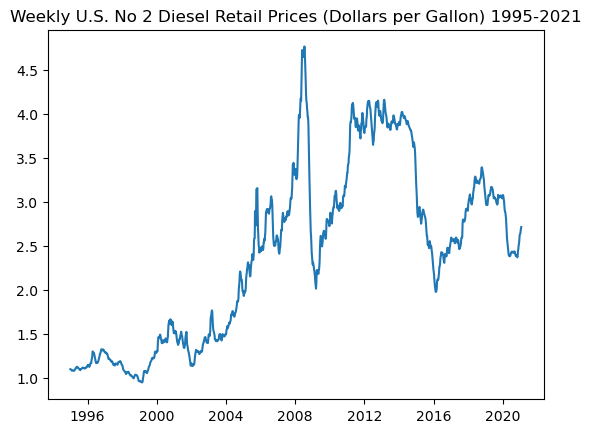

In [19]:
title = 'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
import random
plt.plot(df_diesel.Date, df_diesel.Diesel)
plt.gca().set_title(title)
plt.show()

In [12]:
# Выведем то жу самое, но с помощью bokeh

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
source = ColumnDataSource(df_diesel)
plot = figure(x_axis_type="datetime")
legend_diesel = 'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
plot.line(x='Date', y='Diesel', line_width=1, source=source, color='red', legend_label=legend_diesel)
output_notebook() # покажем вывод в Jupiter Notebook
show(plot)

Loading BokehJS ...

In [ ]:
'''
Линейная регрессия
'''

In [13]:
# Создадим признак Year и заменим Date

df_diesel['Year'] = 0
df_diesel['Year'] = df_diesel['Date'].dt.strftime('%Y').astype(int)
df_diesel.drop(columns=['Date'], inplace=True)
df_diesel.head()

,Diesel,Year
0,1.104,1995
1,1.102,1995
2,1.100,1995
3,1.095,1995
4,1.090,1995


In [14]:
# Выведем среднюю стоимость по годам

df_year = df_diesel[["Year", "Diesel"]].groupby(['Year'],as_index=False).mean()
df_year.tail(10)

,Year,Diesel
17,2012,3.967736
18,2013,3.921731
19,2014,3.824635
20,2015,2.706635
21,2016,2.303942
22,2017,2.650038
23,2018,3.177642
24,2019,3.055827
25,2020,2.550808
26,2021,2.680500


In [15]:
df_year.dtypes

Year        int32
Diesel    float64
dtype: object

Predict Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021
$1.4170382971254725 USD


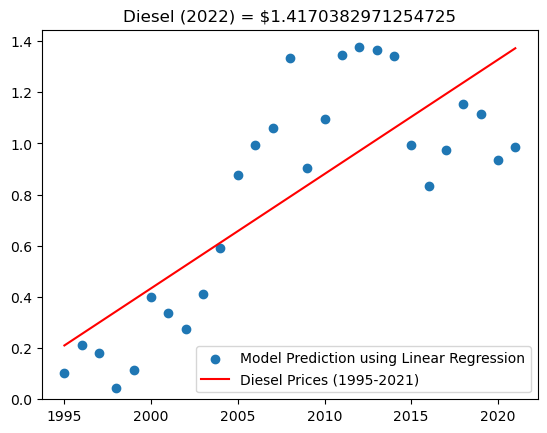

In [25]:
# Преобразование переменных — это способ улучшить работу данных в вашей модели. Сравним до и после.

df_year['Diesel'] = np.log(df_year['Diesel'])

X = df_year['Year']
y = df_year['Diesel']
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept

label = 'Predict Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
model = list(map(modelPrediction, X)) # scipy
x_pred = 2022
y_pred = modelPrediction(x_pred)
print(label)
round(y_pred, 2)
print('${} USD'.format(y_pred))

title='Diesel (2022) = ${}'.format(y_pred)
plt.title(title)
plt.scatter(X, y)
plt.plot(X, model, color='red')
plt.ylim(ymin=0) # стартуем с нуля
plt.legend(['Model Prediction using Linear Regression', 'Diesel Prices (1995-2021)'])
plt.show()

Diesel
score = 53.41
coef = [0.09010781]
intercept = -178.52281241298084
SciKit-Learn


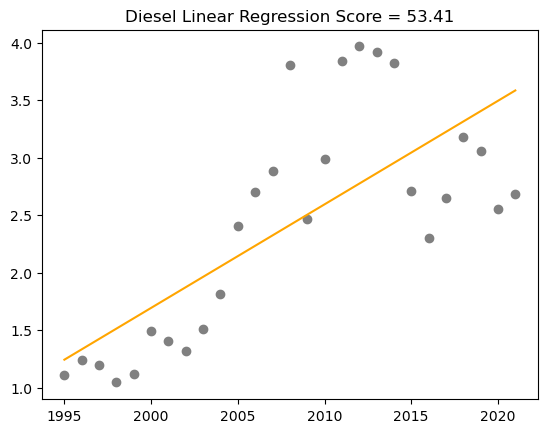

In [16]:
import sklearn
from sklearn.linear_model import LinearRegression

print('Diesel')

x = df_year[['Year']].values
y = df_year['Diesel'].values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y)
score = regr.score(x, y)
score = round(score*100,2)

title = f"Diesel Linear Regression Score = {score}"
plt.title(title)

print('score = {}'.format(score))

coef = regr.coef_
print('coef = {}'.format(coef))

intercept = regr.intercept_
print('intercept = {}'.format(intercept))

y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray')
plt.plot(x, y_pred, color='orange')

plt.show()

In [ ]:
'''
Чем обычный бензин отличается от среднего или премиум-класса?
Бензин может быть как обычным, так и средним или премиум-классом. Как они соотносятся по цене?

Создадим визуализацию данных, которая сравнивает цены обычного, среднего и премиум-класса.
'''

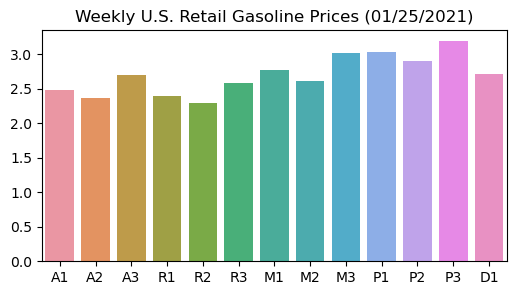

In [17]:
title = 'Weekly U.S. Retail Gasoline Prices (01/25/2021)'
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(6,3))
plt.title(title)
sns.barplot(data=df_today)
plt.show()

In [18]:
title = 'Weekly U.S. Retail Gasoline Prices (01/25/2021)'
from bokeh.io import show, output_notebook

output_notebook()
x =['A1',
    'A2',
    'A3',
    'R1',
    'R2',
    'R3',
    'M1',
    'M2',
    'M3',
    'P1',
    'P2',
    'P3',
    'D1']
p = figure(x_range=x, plot_height=250, title=title)
p.vbar(x=x, top=[df_today['A1'].values[0], 
     df_today['A2'].values[0], 
     df_today['A3'].values[0], 
     df_today['R1'].values[0], 
     df_today['R2'].values[0], 
     df_today['R3'].values[0], 
     df_today['M1'].values[0], 
     df_today['M2'].values[0], 
     df_today['M3'].values[0], 
     df_today['P1'].values[0], 
     df_today['P2'].values[0], 
     df_today['P3'].values[0], 
     df_today['D1'].values[0]], width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

Loading BokehJS ...

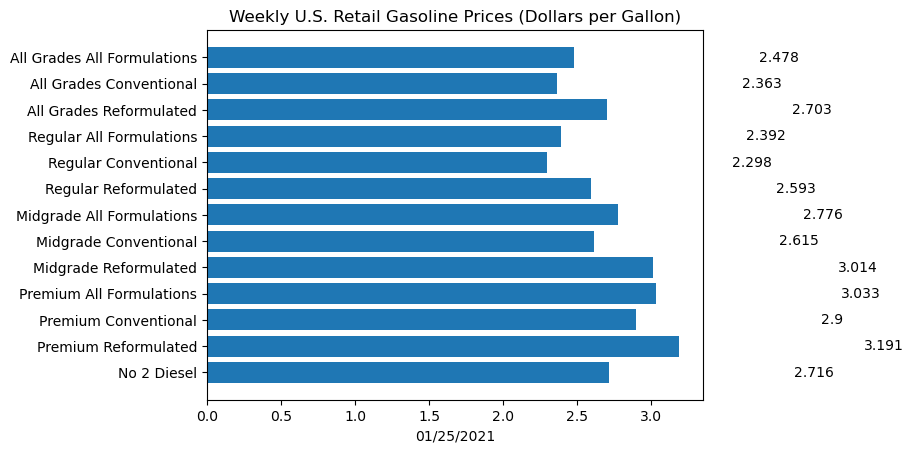

In [19]:
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('All Grades All Formulations', 
     'All Grades Conventional', 
     'All Grades Reformulated',
     'Regular All Formulations',
     'Regular Conventional',
     'Regular Reformulated',
     'Midgrade All Formulations',
     'Midgrade Conventional',
     'Midgrade Reformulated',
     'Premium All Formulations',
     'Premium Conventional',
     'Premium Reformulated',
     'No 2 Diesel')
y_pos = np.arange(len(y))
x = (df_today['A1'].values[0], 
     df_today['A2'].values[0], 
     df_today['A3'].values[0], 
     df_today['R1'].values[0], 
     df_today['R2'].values[0], 
     df_today['R3'].values[0], 
     df_today['M1'].values[0], 
     df_today['M2'].values[0], 
     df_today['M3'].values[0], 
     df_today['P1'].values[0], 
     df_today['P2'].values[0], 
     df_today['P3'].values[0], 
     df_today['D1'].values[0])
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('01/25/2021')
ax.set_title('Weekly U.S. Retail Gasoline Prices (Dollars per Gallon)')
for i, v in enumerate(x):
    ax.text(v + 1.25, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [ ]:
'''
bar-chart-race
'''

In [20]:
df = df.tail(100)

In [21]:
df.shape

(100, 14)

In [22]:
df.reset_index(drop=True, inplace=True)
df = df.set_index('Date')
df.head()

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
Date,,,,,,,,,,,,,
03/04/2019,2.502,2.412,2.678,2.422,2.352,2.574,2.768,2.638,2.956,3.020,2.919,3.137,3.076
03/11/2019,2.549,2.458,2.726,2.471,2.399,2.625,2.807,2.674,2.999,3.059,2.959,3.175,3.079
03/18/2019,2.625,2.537,2.800,2.548,2.477,2.700,2.879,2.750,3.064,3.135,3.041,3.244,3.070
03/25/2019,2.701,2.604,2.893,2.623,2.544,2.793,2.960,2.819,3.162,3.212,3.105,3.337,3.080
04/01/2019,2.770,2.670,2.967,2.691,2.611,2.863,3.034,2.885,3.250,3.286,3.172,3.419,3.078


In [25]:
bcr.bar_chart_race(
    df=df,
    filename='output.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='df_today',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)

C:\Users\Luther\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\Luther\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [26]:
bcr.bar_chart_race(df=df, filename=None)

C:\Users\Luther\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\Luther\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
